# Assignment 1

First we need to import a few modules, execute the cell below:

In [51]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [52]:
def f(x):
    return numpy.cos(x);

You can use the following cell to check that your code works for scalar arguments:

In [8]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [53]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [54]:
def df_analytic(x):
    return -numpy.sin(x);

In [55]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [56]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [57]:
def backward_difference(f, x, dx):
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    y_x=numpy.cos(x)
    y_dx=numpy.cos(x-dx)
    return (y_x-y_dx)/dx;

In [58]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


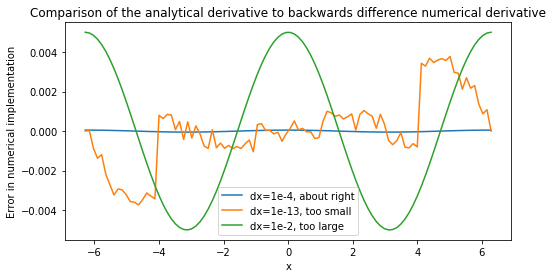

In [59]:

xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-4)
df_dx_2 = backward_difference(f, xs, dx=1e-13)
df_dx_3 = backward_difference(f, xs, dx=1e-2)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
plt.plot(xs, df_dx_1 - df_dx_analytical, label="dx=1e-4, about right")
plt.plot(xs, df_dx_2 - df_dx_analytical, label="dx=1e-13, too small")
plt.plot(xs, df_dx_3 - df_dx_analytical, label="dx=1e-2, too large")
plt.xlabel("x")
plt.ylabel("Error in numerical implementation")
plt.title("Comparison of the analytical derivative to backwards difference numerical derivative")
plt.legend()
plt.show()

**Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


By using a Taylor expansion on the expression for $f'(x)$ in the backwards difference method we get that:

$f'(x)\approx f'(x)-\frac{1}{2}f''(x)\Delta x+O(\Delta x^2).$

Hence the error is the difference between the analytical value for $f'(x)$ and the numerical value for $f'(x)$, and is given by:

$E(f'(x))=-\frac{1}{2}f''(x)\Delta x+O(\Delta x^2),$

and therefore the error increases as $\Delta x$ increases, causing a loss of accuracy for too high $\Delta x$.

For too small values of $\Delta x$ however, we have another problem that very small floats lose precision on a computer. This is to conserve memory by not remembering too many digits of a number, but leads to inaccuracies when carrying out mathematical operations with these imprecise floats. This is represented in the graph above by the random noise of the plot with the too small $\Delta x$.

Therefore a value of $\Delta x$ must be small enough to minimise the error in the approximation, but not too small to lead to inaccuracies to do computer imprecision.